# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Azat Dovgeldiyev
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
temp=[]
humidity=[]
cloud=[]
wind=[]
lat=[]
lang=[]
country=[]
date=[]
cname=[]
count=1
print("Beginning Data Retrieval \n---------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cname.append(response['name'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lang.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_process=response['name']
        print(f'Processing record {count}| {city_process}')
        count+=1
        time.sleep(1.01)
    except KeyError:
        print('City not found. Skipping...')
    continue
print('---------------------\nData Retrieval complete')

Beginning Data Retrieval 
---------------------
Processing record 1| Aykino
Processing record 2| Vila
Processing record 3| Codrington
Processing record 4| George Town
Processing record 5| Oktyabr'skiy
Processing record 6| Hilo
Processing record 7| Atuona
Processing record 8| Bluff
Processing record 9| Rundu
Processing record 10| Hasaki
Processing record 11| Londonderry
Processing record 12| Mataura
Processing record 13| Arraial do Cabo
Processing record 14| Dingle
Processing record 15| Barrow
Processing record 16| New Norfolk
Processing record 17| Trelew
Processing record 18| Esim
Processing record 19| Boddam
Processing record 20| Qarayeri
Processing record 21| Rikitea
City not found. Skipping...
Processing record 22| Port Alfred
Processing record 23| Hofn
Processing record 24| Qaanaaq
Processing record 25| Pochutla
Processing record 26| Sola
Processing record 27| Yellowknife
City not found. Skipping...
City not found. Skipping...
Processing record 28| Kaitangata
City not found. Skippi

Processing record 237| Leinefelde-Worbis
Processing record 238| Carutapera
Processing record 239| Znamenskoye
Processing record 240| Acapulco de Juárez
Processing record 241| Paysandu
Processing record 242| Río Gallegos
Processing record 243| Laguna
Processing record 244| Dukat
Processing record 245| Kholmy
Processing record 246| Sarangani
City not found. Skipping...
Processing record 247| Resistencia
Processing record 248| Batagay-Alyta
Processing record 249| Nouadhibou
Processing record 250| Kahului
Processing record 251| Flinders
City not found. Skipping...
Processing record 252| Westport
Processing record 253| Atikokan
Processing record 254| Alekseyevsk
Processing record 255| Te Anau
Processing record 256| Mahon
Processing record 257| Chiredzi
Processing record 258| Narsaq
Processing record 259| Huoqiu
City not found. Skipping...
Processing record 260| Werda
Processing record 261| Carbondale
Processing record 262| Ulmeni
Processing record 263| Ibrā’
Processing record 264| Noumea
Pr

Processing record 472| Ishigaki
Processing record 473| Beloha
Processing record 474| Agropoli
Processing record 475| Nova Lima
City not found. Skipping...
Processing record 476| Araranguá
Processing record 477| Kangaba
Processing record 478| Bonthe
Processing record 479| Karratha
Processing record 480| Labuan
Processing record 481| Manatí
Processing record 482| Bud
Processing record 483| Orţişoara
City not found. Skipping...
Processing record 484| Avera
Processing record 485| Ucluelet
Processing record 486| Chumikan
Processing record 487| Gladstone
Processing record 488| Mnogovershinnyy
Processing record 489| Beira
Processing record 490| Clearlake
Processing record 491| Ribeira Grande
Processing record 492| Antalaha
Processing record 493| Pokhara
Processing record 494| Marzuq
Processing record 495| Tamandaré
Processing record 496| Matagami
Processing record 497| Tezu
City not found. Skipping...
Processing record 498| Ziniaré
Processing record 499| Zile
Processing record 500| Kidodi
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
import csv
weather_dict = {
    "Country":country,
    "City": cname,
    "Lat": lat,
    'Lang':lang,
    "Temp": temp,
    'Cloud':cloud,
    'Wind speed':wind,
    "Humidity":humidity,
    'Date':date,
}
weather_data=pd.DataFrame(weather_dict)
weather_data.to_csv('output_data/weather_data.csv',encoding='utf-8')
weather_data.head()

,Country,City,Lat,Lang,Temp,Cloud,Wind speed,Humidity,Date
0,RU,Aykino,62.22,49.99,26.67,86,5.86,97,1586389037
1,PT,Vila,42.03,-8.16,63.00,75,1.88,87,1586389038
2,AU,Codrington,-38.27,141.97,60.31,6,9.17,75,1586389039
3,MY,George Town,5.41,100.34,78.80,20,2.24,100,1586388921
4,RU,Oktyabr'skiy,54.48,53.47,34.57,99,6.73,89,1586389041


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

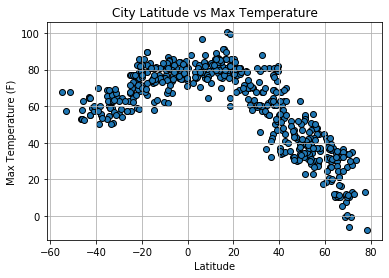

In [61]:
plt.scatter(weather_data['Lat'],weather_data['Temp'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid(True)
plt.savefig('output_data\City_Lat vs Max_Temp.png')
plt.show()

#### Latitude vs. Humidity Plot

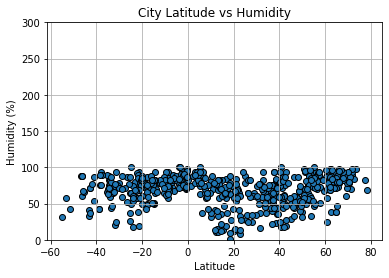

In [6]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.ylim(0,300)
plt.grid(True)
plt.savefig('output_data\City_Lat vs Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

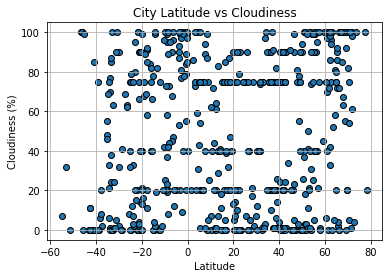

In [7]:
plt.scatter(weather_data['Lat'],weather_data['Cloud'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid(True)
plt.savefig('output_data\City_Lat vs Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

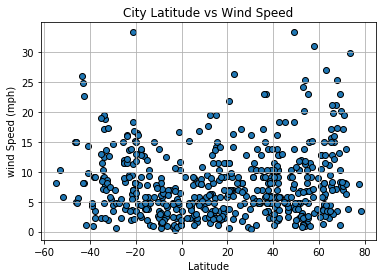

In [8]:
plt.scatter(weather_data['Lat'],weather_data['Wind speed'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid(True)
plt.savefig('output_data\City_Lat vs Wind Speed (mph).png')
plt.show()

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
def functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig):
    slope, intercept, r_value, p_value, std_err=linregress(x_axis,y_axis)
    line_eq="y = "+str(round(slope,2)) + "x + "+str(round(intercept,2))
    print(f"The r-squared is: {r_value}")
    regress_fit = slope * x_axis +intercept
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_fit,'r-')
    plt.annotate(line_eq,lblpos,fontsize=15,color='red')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig(f'output_data\{fig}.png')
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames
northern_pd=weather_data.loc[weather_data['Lat']>=0.0]

southern_pd=weather_data.loc[weather_data['Lat']<0.0]
northern_pd.head()

,Country,City,Lat,Lang,Temp,Cloud,Wind speed,Humidity,Date
0,RU,Aykino,62.22,49.99,26.67,86,5.86,97,1586389037
1,PT,Vila,42.03,-8.16,63.00,75,1.88,87,1586389038
3,MY,George Town,5.41,100.34,78.80,20,2.24,100,1586388921
4,RU,Oktyabr'skiy,54.48,53.47,34.57,99,6.73,89,1586389041
5,US,Hilo,19.73,-155.09,80.60,90,5.82,61,1586388506


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8994733167261413


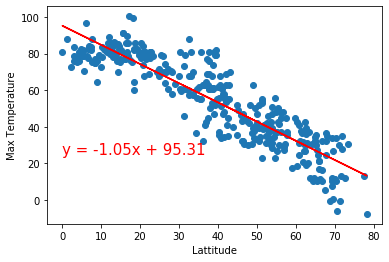

In [34]:
xlab='Lattitude'
ylab='Max Temperature'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Temp']
lblpos=(0,25)
fig='NorthMaxTemp vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7228456395850054


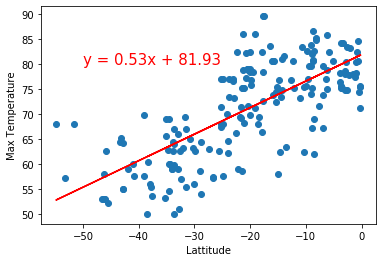

In [39]:
xlab='Lattitude'
ylab='Max Temperature'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Temp']
lblpos=(-50,80)
fig='SouthMaxTemp vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27021354743598897


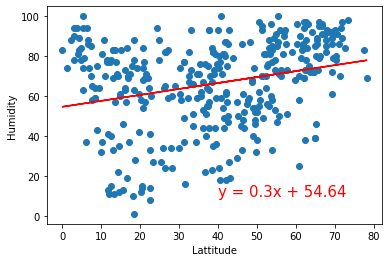

In [49]:
xlab='Lattitude'
ylab='Humidity'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Humidity']
lblpos=(40,10)
fig='NorthHumid vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33367030903772094


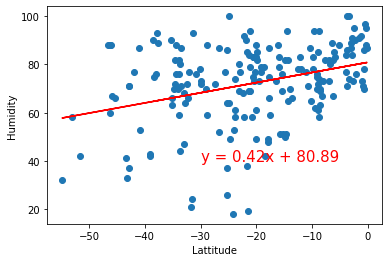

In [55]:
xlab='Lattitude'
ylab='Humidity'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Humidity']
lblpos=(-30,40)
fig='SouthhHumid vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2086549939993543


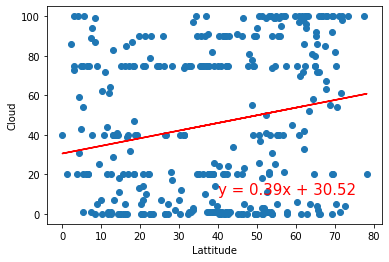

In [56]:
xlab='Lattitude'
ylab='Cloud'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Cloud']
lblpos=(40,10)
fig='NorthCloud vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30426366241942937


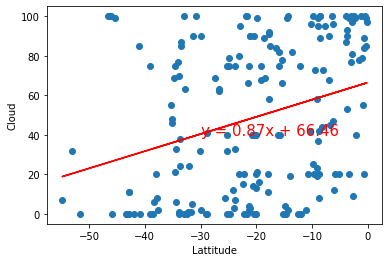

In [57]:
xlab='Lattitude'
ylab='Cloud'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Cloud']
lblpos=(-30,40)
fig='SouthhCloud vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19754096772535187


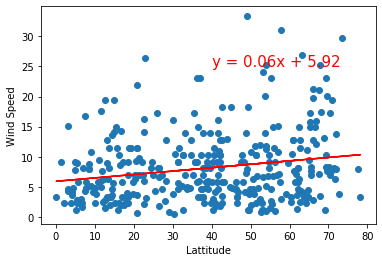

In [58]:
xlab='Lattitude'
ylab='Wind Speed'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Wind speed']
lblpos=(40,25)
fig='NorthWind vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3474647005951966


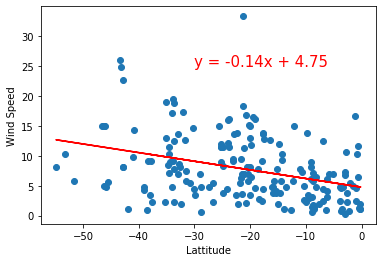

In [60]:
xlab='Lattitude'
ylab='Wind Speed'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Wind speed']
lblpos=(-30,25)
fig='SouthWind vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)